In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv


### Data Analysis

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('../input/paysim1/PS_20174392719_1491204439457_log.csv')

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
data.shape

(6362620, 11)

In [6]:
data.isnull().values.any()

False

There are no null values.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [9]:
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

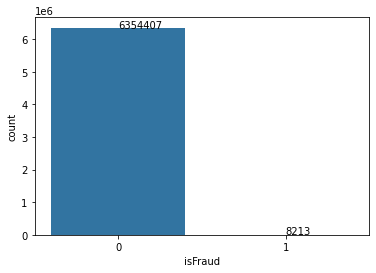

In [10]:
fig,ax = plt.subplots()
sns.countplot(x=data.isFraud,ax=ax)
for p in ax.patches:
        val = p.get_height() #height of the bar
        x = p.get_x() + p.get_width()/2 # x- position 
        y = p.get_y() + p.get_height() #y-position
        ax.annotate(val,(x,y))

<AxesSubplot:xlabel='isFraud', ylabel='amount'>

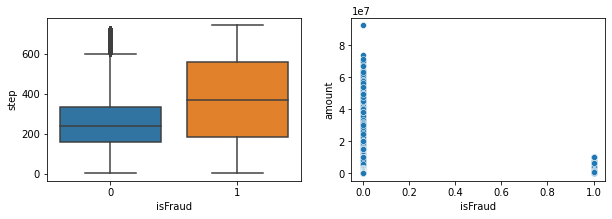

In [11]:
fig,ax = plt.subplots(1,2,figsize=(10,3))
sns.boxplot(x=data.isFraud,y=data.step,ax=ax[0])
sns.scatterplot(x=data.isFraud,y=data.amount,ax=ax[1])

As seen above step influences fraud detection. Therefore it might be a useful feature

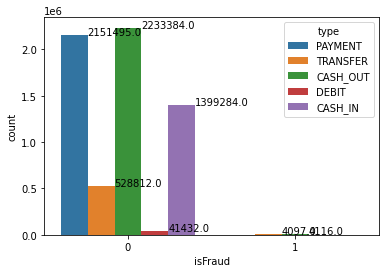

In [12]:
fig,ax = plt.subplots()
sns.countplot(x=data.isFraud,hue=data.type,ax=ax)
for p in ax.patches:
        val = p.get_height() 
        x = p.get_x() + p.get_width()  
        y = p.get_y() + p.get_height() 
        ax.annotate(val,(x,y))

In [13]:
print('Type of payments which are fraudulent are:',list(data.loc[(data.isFraud==1)].type.unique()))
print('No. of fraudulent transfers which are "Transfer" type are :', len(data.loc[(data.isFraud==1)&(data.type=='TRANSFER')]))
print('No. of fraudulent transfers which are "CASH_OUT" type are :', len(data.loc[(data.isFraud==1)&(data.type=='CASH_OUT')]))

Type of payments which are fraudulent are: ['TRANSFER', 'CASH_OUT']
No. of fraudulent transfers which are "Transfer" type are : 4097
No. of fraudulent transfers which are "CASH_OUT" type are : 4116


All fraud transfers are under the type 'TRANSFER' and 'CASH-OUT'. 

In [14]:
data['nameOrig'].str.contains('M').any()

False

In [15]:
len(data.loc[data['nameDest'].str.contains('M') == True])

2151495

In [16]:
data.loc[data['type']=='TRANSFER'].nameDest.str.contains('M').any()

False

In [17]:
data.loc[data['type']=='CASH_OUT'].nameDest.str.contains('M').any()

False

nameOrig and nameDest can dropped as they dont impact fraud. Also there are no suspicious transfers to merchants. Therefore they can be dropped.

In [18]:
len(data.loc[(data['oldbalanceOrg']==0) & (data['newbalanceOrig']==0) & (data['amount']!=0)])

2088969

In [19]:
print(len(data.loc[(data['oldbalanceOrg']==0) & (data['newbalanceOrig']==0) & (data['amount']!=0) & (data.isFraud==1)]))
print(len(data.loc[(data['oldbalanceOrg']==0) & (data['newbalanceOrig']==0) & (data['amount']!=0) & (data.isFraud==0)]))

25
2088944


In [20]:
len(data.loc[(data['oldbalanceDest']==0) & (data['newbalanceDest']==0) & (data['amount']!=0)])

2317276

In [21]:
print(len(data.loc[(data['oldbalanceDest']==0) & (data['newbalanceDest']==0) & (data['amount']!=0) & (data.isFraud==1)]))
print(len(data.loc[(data['oldbalanceDest']==0) & (data['newbalanceDest']==0) & (data['amount']!=0) & (data.isFraud==0)]))

4070
2313206


In [22]:
len(data.loc[(data['oldbalanceDest']==0) & (data['newbalanceDest']==0) & (data['amount']!=0) & (data.isFraud==0)& (data.nameDest.str.contains('M'))])

2151495

Almost half of the transactions with 0 old and new balance of desinations are fraudulent.Therefore it is a strong indicator of fraud( Also there are no merchants in fraudulent transactions whose balance details are unknown, so this feature is strong indicator of fraud).

And the genuine transactions where balance is 0 are mostly involved by merchants. Therefore it is better to only work with 'TRANSFER' and 'CASH_OUT' transactions as no merchants are involved and they also include all fraud transactions.

In [23]:
data['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [24]:
data.loc[data['isFlaggedFraud']==1].amount.describe()

count    1.600000e+01
mean     4.861598e+06
std      3.572499e+06
min      3.538742e+05
25%      2.242749e+06
50%      4.234245e+06
75%      7.883451e+06
max      1.000000e+07
Name: amount, dtype: float64

In [25]:
data.loc[data['isFlaggedFraud']==0].amount.describe()

count    6.362604e+06
mean     1.798501e+05
std      6.037884e+05
min      0.000000e+00
25%      1.338955e+04
50%      7.487127e+04
75%      2.087205e+05
max      9.244552e+07
Name: amount, dtype: float64

In [26]:
len(data.loc[(data['isFlaggedFraud']==1)& (data.isFraud==1)])

16

In description it is said 'isFlaggedFraud' will be 1 if amount of transaction is more than 200000, but the amount exceeds 200000 even when it is set to 0 as seen in above (where 75 percentile is more than 200000). Also whenever isFlaggedFraud is 1, value of isFraud is also 1. Therefore it doesn't so any correlation with other features and it can be dropped  

### Data Cleaning and Feature Engineering

In [27]:
data.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [28]:
df = data.loc[(data.type=='TRANSFER')|(data.type=='CASH_OUT')]

In [29]:
train = df.copy()

In [30]:
train.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00,1
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0


As seen earlier, 0 values of oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest when amount is not 0 have a good chance of fraudulent transaction, we will create new freatures combining (oldbalanceOrg,newbalanceOrig,amount) and (oldbalanceDest,newbalanceDest,amount) 

In [31]:
train['errorOrig'] = train['amount'] + train['newbalanceOrig'] - train['oldbalanceOrg']
train['errorDest'] = train['amount'] + train['oldbalanceDest'] - train['newbalanceDest']

In [32]:
train.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorOrig,errorDest
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00,1,0.00,181.0
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1,0.00,21363.0
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0,213808.94,182703.5
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0,214605.30,237735.3
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0,300850.89,-2401220.0


In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
train['type'] = LabelEncoder().fit_transform(train['type'])

In [35]:
train.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorOrig,errorDest
2,1,1,181.00,181.0,0.0,0.0,0.00,1,0.00,181.0
3,1,0,181.00,181.0,0.0,21182.0,0.00,1,0.00,21363.0
15,1,0,229133.94,15325.0,0.0,5083.0,51513.44,0,213808.94,182703.5
19,1,1,215310.30,705.0,0.0,22425.0,0.00,0,214605.30,237735.3
24,1,1,311685.89,10835.0,0.0,6267.0,2719172.89,0,300850.89,-2401220.0


## Modelling

From the model evaluation (or confusion matrix), we know that

Accuracy = (TP + TN) / Total                                               
Presicion = TP / (TP + FP)                                                       
Recall = TP / (TP + FN) 

As such, specifically for this problem, we are interested in the recall score to capture the most fraudulent transactions. As we know, due to the imbalance of the data, many observations could be predicted as False Negatives, being, that we predict a normal transaction, but it is in fact a fraudulent one. Recall captures this.

Obviously, trying to increase recall, tends to come with a decrease of precision. However, in our case, if we predict that a transaction is fraudulent and turns out not to be, is not a massive problem compared to the opposite.

Due to this, many evaluation will be based on recall score.

**Performance Metric selection**:

Since the data is highly skewed, I am using the area under the precision-recall curve (AUPRC) rather than the conventional area under the receiver operating characteristic (AUROC). 

F1 score is the harmonic mean of the precision and recall. The highest possible value of F1 is 1, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero.

We should do more focus on FP & FN.

**ML algorithm selection**:

1. A first approach to deal with imbalanced data is to balance it by discarding the majority class before applying an ML algorithm. The disadvantage of undersampling is that a model trained in this way will not perform well on real-world skewed test data since almost all the information was discarded.

2. I find, however, that the best result is obtained on the original dataset by using a ML algorithm based on ensembles of decision trees that intrinsically performs well on imbalanced data. Such algorithms not only allow for constructing a model that can cope with the missing values in our data, but they naturally allow for speedup via parallel-processing.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score,accuracy_score,f1_score,classification_report,precision_recall_curve,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [37]:
y = train['isFraud']
train.drop('isFraud',axis=1,inplace=True)

In [38]:
x_train,x_test,y_train,y_test = train_test_split(train,y,test_size=0.2)

In [39]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2216327, 9)
(2216327,)
(554082, 9)
(554082,)


In [40]:
x_train.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,errorOrig,errorDest
1931251,169,0,82181.32,0.0,0.0,636890.64,719071.96,82181.32,0.000000e+00
5074525,355,0,123897.49,6194.0,0.0,715725.71,839623.20,117703.49,0.000000e+00
4680947,331,0,190990.94,0.0,0.0,4669698.59,4860689.53,190990.94,0.000000e+00
95302,10,1,1136816.00,86944.0,0.0,636908.07,1635321.98,1049872.00,1.384021e+05
4551274,327,0,102462.53,6074.0,0.0,1030052.33,1132514.86,96388.53,-2.328306e-10


In [41]:
random_forest = RandomForestClassifier()

In [42]:
random_forest.fit(x_train,y_train)

RandomForestClassifier()

In [43]:
y_pred = random_forest.predict(x_train)

In [44]:
def model_result(clf,x_test,y_test):
    y_prob=clf.predict_proba(x_test)
    y_pred=clf.predict(x_test)
    print('AUPRC :', (average_precision_score(y_test, y_prob[:, 1])))
    print('F1 - score :',(f1_score(y_test,y_pred)))
    print('Confusion_matrix : ')
    print(confusion_matrix(y_test,y_pred))
    print("accuracy_score")
    print(accuracy_score(y_test,y_pred))
    print("classification_report")
    print(classification_report(y_test,y_pred))

In [45]:
model_result(random_forest,x_train,y_train)

AUPRC : 1.0
F1 - score : 1.0
Confusion_matrix : 
[[2209781       0]
 [      0    6546]]
accuracy_score
1.0
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2209781
           1       1.00      1.00      1.00      6546

    accuracy                           1.00   2216327
   macro avg       1.00      1.00      1.00   2216327
weighted avg       1.00      1.00      1.00   2216327



In [46]:
model_result(random_forest,x_test,y_test)

AUPRC : 0.9970060360159229
F1 - score : 0.9981971153846153
Confusion_matrix : 
[[552415      0]
 [     6   1661]]
accuracy_score
0.9999891712778975
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552415
           1       1.00      1.00      1.00      1667

    accuracy                           1.00    554082
   macro avg       1.00      1.00      1.00    554082
weighted avg       1.00      1.00      1.00    554082



Our default model performs good enough with recall score of 1.00 on both test and train data. By zooming in, only 5 prediction are False Negatives. 

In [47]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
newbalanceOrig,0.413
oldbalanceOrg,0.105
newbalanceDest,0.093
errorOrig,0.087
type,0.080
amount,0.076
oldbalanceDest,0.060
step,0.043
errorDest,0.042


According to our model newbalanceOrig, oldbalanceOrg are two of the most important features maybe because all fraudulent transactions involve wiping out complete amount which would make newbalanceOrig 0. To my surprise step is second least important feature, I thought it would be more important.

### conclusion

We explored the whole data using visualization techniques, added new features , removed unwanted features etc.

We also used random forest classifier because of skewness of the data, it is also robust to outliers.

In future developments, the should be taking care of 'TRANSFER' and 'CASH-OUT' type of transactions as every fraud transaction is falls under these categories. The company sholud review the accounts whose balance becomes 0 after the transactions. 